# How do different economic factors influence the economic popularity of a state? 

## Data Preprocessing and Exploration

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Loading and inspecting the newly uploaded "combined.csv"
df = pd.read_csv("combined.csv")
df.head()

,State,year,tax_rate,gdp,min_wage,unemployment_rate,population,median_hh_income,business_applications
0,Alabama,2005,6.50,"158,850,000,000.00",5.15,4.50,4569805,53550,31078
1,Alabama,2006,6.50,"166,470,000,000.00",5.15,4.00,4628981,53170,33918
2,Alabama,2007,6.50,"172,980,000,000.00",5.15,4.00,4672840,57660,33701
3,Alabama,2008,6.50,"174,530,000,000.00",6.55,5.70,4718206,58600,32222
4,Alabama,2009,6.50,"170,930,000,000.00",7.25,11.00,4757938,52890,29221


In [38]:
# Descriptive statistics for the dataset
df.describe()

,year,tax_rate,gdp,min_wage,unemployment_rate,population,median_hh_income,business_applications
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,"2,013.50",5.98,"346,415,603,485.84",7.75,5.63,"6,204,966.70","69,993.76","61,295.96"
std,5.19,2.67,"445,383,835,964.65",1.80,2.16,"6,979,892.70","12,105.44","79,791.14"
min,"2,005.00",0.00,"23,609,000,000.00",2.65,2.10,"514,157.00","39,670.00","3,818.00"
25%,"2,009.00",5.00,"85,009,500,000.00",7.25,4.00,"1,754,429.75","61,170.00","13,850.50"
50%,"2,013.50",6.50,"209,615,000,000.00",7.25,5.10,"4,364,332.00","68,490.00","37,555.00"
75%,"2,018.00",7.75,"415,530,000,000.00",8.25,6.90,"7,055,983.00","78,585.00","70,977.25"
max,"2,022.00",9.99,"3,598,100,000,000.00",16.10,13.70,"39,501,653.00","108,900.00","633,654.00"


# Correlation Analysis:

Next, we'll compute the correlations between the various economic factors and the number of business applications to identify any strong relationships.​​

In [39]:
# Computing correlations between economic factors and business applications
correlation_matrix = df.corr() 
correlation_with_business_apps = correlation_matrix['business_applications'].sort_values(ascending=False)

correlation_with_business_apps = correlation_with_business_apps.drop(['business_applications'])

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


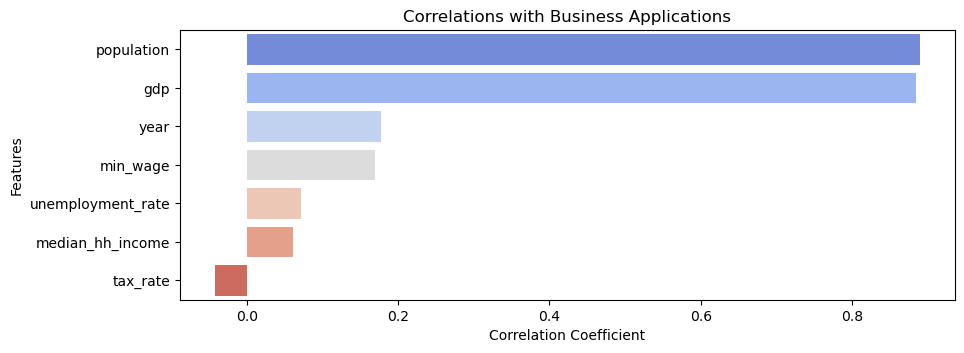

In [40]:
# Visualizing correlations with business applications
plt.figure(figsize=(10, len(correlation_with_business_apps) * 0.5)) 


sns.barplot(x=correlation_with_business_apps, y=correlation_with_business_apps.index, palette='coolwarm')


plt.title("Correlations with Business Applications")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")


plt.show()

1. Population (0.889): There's a strong positive correlation with business applications. This indicates that as the population in a state increases, there's a tendency for the number of business applications to also increase. A larger population can provide a larger customer base and labor availability which is attractive to a new business 
  
2. GDP (0.885): A strong positive correlation with business applications suggests that states with higher GDPs might have a conducive environment for new businesses, leading to more applications. A growing economy tends to attract more entrepreneurs and investors who start new businesses
  
3. Year (0.177): A weak positive correlation, indicating that over the years, there has been a slight increase in business applications.

4. Minimum Wage (0.169): A weak positive correlation suggests that an increase in minimum wage might slightly favor more business applications, but the relationship isn't strong.  
  
5. Median Household Income (0.006): Very weak negative correlation, suggesting that the median household income doesn't significantly influence business applications.  
  
6. Unemployment Rate (0.007): Very weak negative correlation. Typically, one might expect a higher unemployment rate to deter business applications, but the relationship isn't strong in our data.  
  
7. Tax Rate (-0.04): A weak negative correlation, indicating that as the tax rate increases, there might be a slight decrease in business applications.

## Identifying Best Model

In [41]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
features = list(df.columns)

del features[0] #deleting 'State'
del features[0] #deleting 'year'
del features[-1] #deleting 'business_applications'

print(features)

['tax_rate', 'gdp', 'min_wage', 'unemployment_rate', 'population', 'median_hh_income']


In [43]:
#splitting our dependent and independent variables
X = df[['population', 'gdp', 'min_wage', 'unemployment_rate', 'median_hh_income', 'tax_rate']]
y = df['business_applications']

# Adding a constant to the independent variables matrix (required for statsmodels regression model)
X2 = sm.add_constant(X)

# Fit the regression model using statsmodels
model = sm.OLS(y, X2).fit()
full_y_pred = model.predict(X2)

# Calculate residuals for plotting
residuals = model.resid

# Extract p-values
print(model.pvalues)

const               0.12
population          0.00
gdp                 0.00
min_wage            0.00
unemployment_rate   0.00
median_hh_income    0.09
tax_rate            0.00
dtype: float64


In [44]:
#Printing the regression coefficients 
for i, feature in enumerate(features):
    print(f'{feature}: {model.params[feature]}')

tax_rate: -1614.5871104800099
gdp: 5.063041074914285e-08
min_wage: 2981.1786844711532
unemployment_rate: -2511.000957718506
population: 0.007132876264227306
median_hh_income: -0.20304515366455772


In [45]:
# Calculate performance metrics
full_rmse = np.sqrt(mean_squared_error(y, full_y_pred))
full_mae = mean_absolute_error(y, full_y_pred)
full_r2 = r2_score(y, full_y_pred)

#Printing RMSE, MAE and R-squared value
print(f'RMSE: {full_rmse}, MAE: {full_mae}, R-squared value: {full_r2}')

RMSE: 34618.35374124977, MAE: 17061.25963769586, R-squared value: 0.8115583942373996


- The results of our regression analysis show several interesting effects on our dependent variable, the number of business applications. All values except for the median household income have a statistically significant effect on the number of business applications per state.  

- The R-squared ($R^2$) value of our model is 0.81, which means that 81% of the variation in the number of business applications can be explained by the independent variables in our model.  

- The Root Mean Squared Error (RMSE) of our model is 34,618.35, which implies a difference of about 34,618 business applications between the actual and predicted values. This is a large difference, suggesting that there may be more accurate models for predicting the number of business applications.  

- The Mean Absolute Error, being significantly smaller than the RMSE value, suggests that the model is influenced by outliers in the data. This is coherent with the wide spread of number of business applications across the US. States like California and Texas have a much higher number of business applications than the other states, which may be skewing the model.

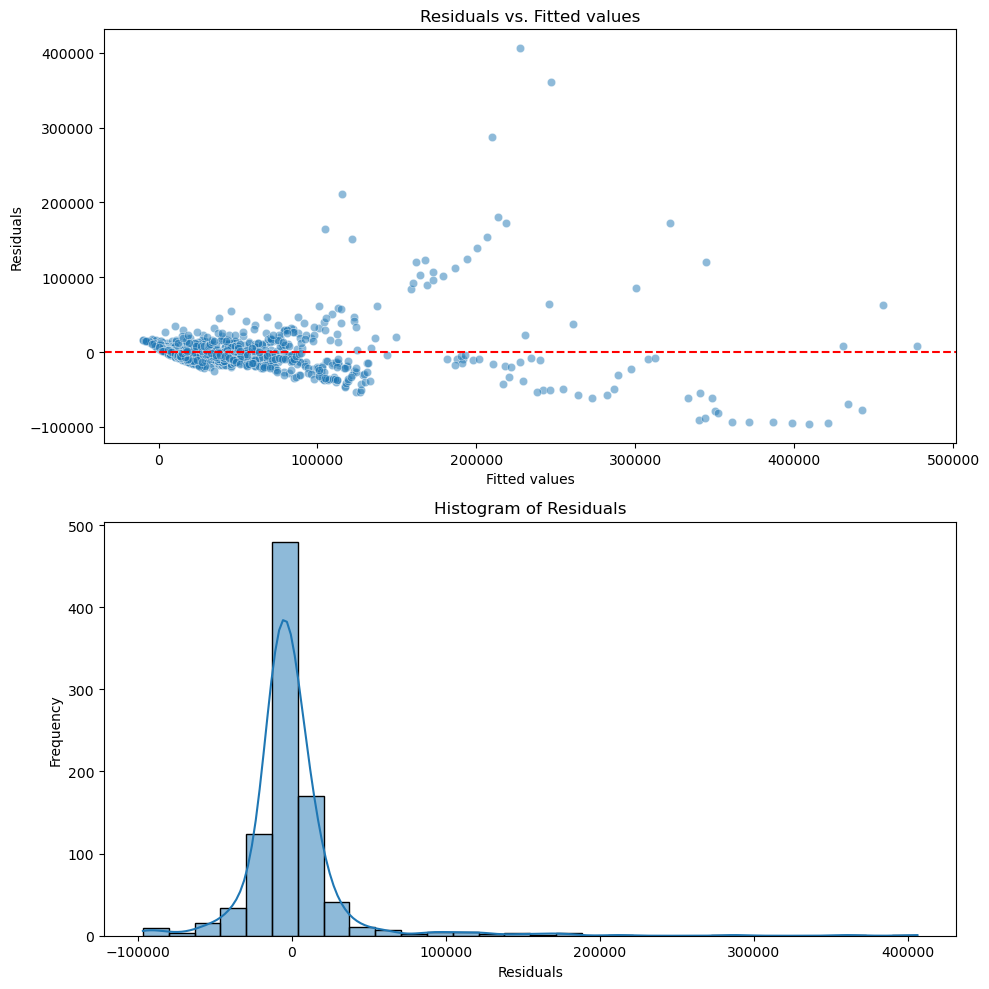

In [46]:
# Plotting residuals
# Set up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Residuals vs Fitted values plot
sns.scatterplot(x=full_y_pred, y=residuals, ax=axs[0], alpha=0.5)
axs[0].axhline(y=0, color='red', linestyle='--')
axs[0].set_title('Residuals vs. Fitted values')
axs[0].set_xlabel('Fitted values')
axs[0].set_ylabel('Residuals')

# Histogram of residuals
sns.histplot(residuals, ax=axs[1], kde=True, bins=30)
axs[1].set_title('Histogram of Residuals')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

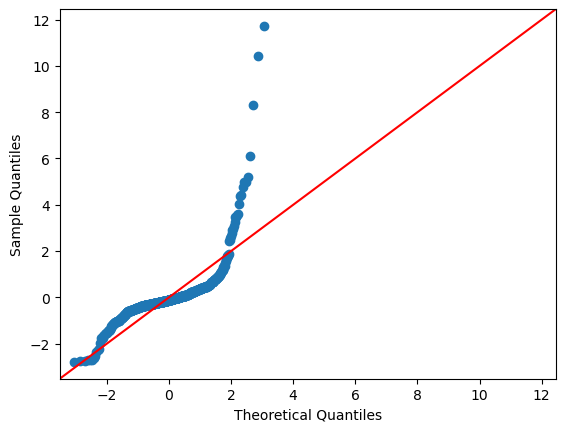

In [47]:
#Q-Q plot

sm.qqplot(residuals, line='45', fit=True)
plt.show()

In [48]:
#Breusch-Pagan Test
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, X2)
labels = ['LM Statistic', 'LM p-Value', 'F-statistic', 'F-test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 100.62398088769704, 'LM p-Value': 1.8593143490055297e-19, 'F-statistic': 18.69161080605369, 'F-test p-value': 1.403789836883332e-20}


In [49]:
#Durbin-Watson Test
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(residuals)
print(dw_test)

0.2942941248635922


- Linearity: A residual analysis of our regression model shows that there is a significant number of outliers with a large distance to the regression line. This is likely due to the outliers in the data, which are skewing the model. This is inline with our analysis of the RMSE and MAE values.
- Normality: The normality assumption states that errors are around 0. The QQ plot indicates no normality 
- Homoscedasticity: The Breusch-Pagan test results and the residuals vs. fitted plot shows homoscedasticity
- Autocorrelation: The result from the Durbin Watson test shows positive autocorrelation in the residuals

# Retraining Linear Regression Model with split data and training random forest model

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [51]:

# Splitting data into dependet and independent variables for further testing
X = df.drop(columns=['State', 'business_applications', 'year'])
y = df['business_applications']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model with training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Directly compute performance metrics for lr_model
lr_predictions = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Directly compute performance metrics for rf_model
rf_predictions = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)


In [52]:
#Comparing Linear Regression and Random Forest Regression
print(f'Random Forest: RMSE: {rf_rmse}, MAE: {rf_mae}, R-squared value: {rf_r2}')
print(f'Linear Regression: RMSE: {lr_rmse}, MAE: {lr_mae}, R-squared value: {lr_r2}')

Random Forest: RMSE: 14459.304830659235, MAE: 7099.44972826087, R-squared value: 0.9646597861986456
Linear Regression: RMSE: 27181.346493195022, MAE: 16090.85240073541, R-squared value: 0.8751132744410776


- When comparing our linear regression model with the random forest model, we can see that the random forest model has a lower RMSE and MAE value. This suggests that the random forest model is more accurate than the linear regression model. Furthermore, the $R^2$ Value of 0.96 suggests that 96% of the variation in the number of business applications can be explained by the independent variables in our model. This is a significant improvement over our initial linear regression model, which had an $R^2$ value of 0.81.
  
Based on the comparison metrics (RMSE, MAE, and $R^2$), the Random Forest model outperforms the Linear Regression model for this dataset. The Random Forest model not only provides more accurate predictions (as indicated by lower RMSE and MAE values) but also captures a higher proportion of the variance in the data (as reflected by the higher $R^2$ value). To confirm this conclusion, we will delve into the crossvalidation of our models.

### Printing Random Forest Paramters

In [53]:
# Get the parameters of the rf_model
params = rf_model.get_params()

# List of hyperparameters for comparison
hyperparameters = ['max_depth', 'max_features', 'min_samples_leaf', 'min_samples_split', 'n_estimators']

print("{:<20} {:<15}".format("Hyperparameter", "Value"))
print("-" * 35)
for hyper in hyperparameters:
    value = params[hyper]
    if value is None:
        value_str = "None"
    else:
        value_str = str(value)
    print("{:<20} {:<15}".format(hyper, value_str))

Hyperparameter       Value          
-----------------------------------
max_depth            None           
max_features         1.0            
min_samples_leaf     1              
min_samples_split    2              
n_estimators         100            


## Cross Validation of Random Forest Model and Linear Reggression

In [54]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

In [55]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Get the cross-validation scores for a model
def get_cv_scores(model, X, y, cv):
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    mae_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    rmse_scores = cross_val_score(model, X, y, cv=cv, scoring=rmse_scorer)
    
    return r2_scores, mae_scores, rmse_scores

# Get cross-validation scores for each model
lr_r2_scores, lr_mae_scores, lr_rmse_scores = get_cv_scores(lr_model, X, y, cv)
rf_r2_scores, rf_mae_scores, rf_rmse_scores = get_cv_scores(rf_model, X, y, cv)

# Create a DataFrame to store the mean and std deviation of the scores
cv_results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2 Mean": [lr_r2_scores.mean(), rf_r2_scores.mean()],
    "MAE Mean": [lr_mae_scores.mean(), rf_mae_scores.mean()],
    "RMSE Mean": [lr_rmse_scores.mean(), rf_rmse_scores.mean()],
})

cv_results_df

,Model,R2 Mean,MAE Mean,RMSE Mean
0,Linear Regression,0.81,"17,357.92","32,896.35"
1,Random Forest,0.93,"8,034.82","19,763.44"


- We performed a 10-fold cross-validation on both the linear regression and the random forest model. The results show that the random forest model has lower RMSE and MAE means than the linear regression model across the 10-fold cross-valdidation procedure. This confirms our conclusion, that the random forest model is a better fit for our model. 
- Given these results we will proceed with our analysis using the Random Forest model.

# Random Forest Performance Evaluation and Improvement

## Comparing Performance on Training and Validation Data

In [56]:
# Predictions on training and test sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculating performance metrics for training data
mae_train = mean_absolute_error(y_train, y_train_pred_rf)
mse_train = mean_squared_error(y_train, y_train_pred_rf)
rmse_train = mean_squared_error(y_train, y_train_pred_rf, squared=False)
r2_train = r2_score(y_train, y_train_pred_rf)

# Calculating performance metrics for test data
mae_test = mean_absolute_error(y_test, y_test_pred_rf)
mse_test = mean_squared_error(y_test, y_test_pred_rf)
rmse_test = mean_squared_error(y_test, y_test_pred_rf, squared=False)
r2_test = r2_score(y_test, y_test_pred_rf)

# Creating a DataFrame to display the performance metrics
performance_metrics = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)'],
    'Training Data': [mae_train, rmse_train, r2_train],
    'Test Data': [mae_test, rmse_test, r2_test]
})

# Setting display option to format the output in a non-scientific number format
pd.options.display.float_format = '{:,.2f}'.format

performance_metrics


,Metric,Training Data,Test Data
0,Mean Absolute Error (MAE),"3,101.87","7,099.45"
1,Root Mean Squared Error (RMSE),"8,569.96","14,459.30"
2,R-squared (R2),0.99,0.96


The Random Forest Model appears to have a strong fit to the training data, as evidenced by the high R2 and low error metrics. However, its performance drops somewhat on the test data, with all error metrics increasing. This suggests that while the model is generally effective, it might be overfitting to the training data and could potentially benefit from Hyperparameter Tuning. Despite this, the R2 value for the test data is still very high, indicating that the model is capturing a significant portion of the variability in the target variable.

## Learning Curves for Random Forest Model: 
- Assess the performance of the model as the size of the training set increases.
- Identify if the model suffers from overfitting or underfitting.
- Determine the training set size required to build a good model.

In [57]:
from sklearn.model_selection import learning_curve

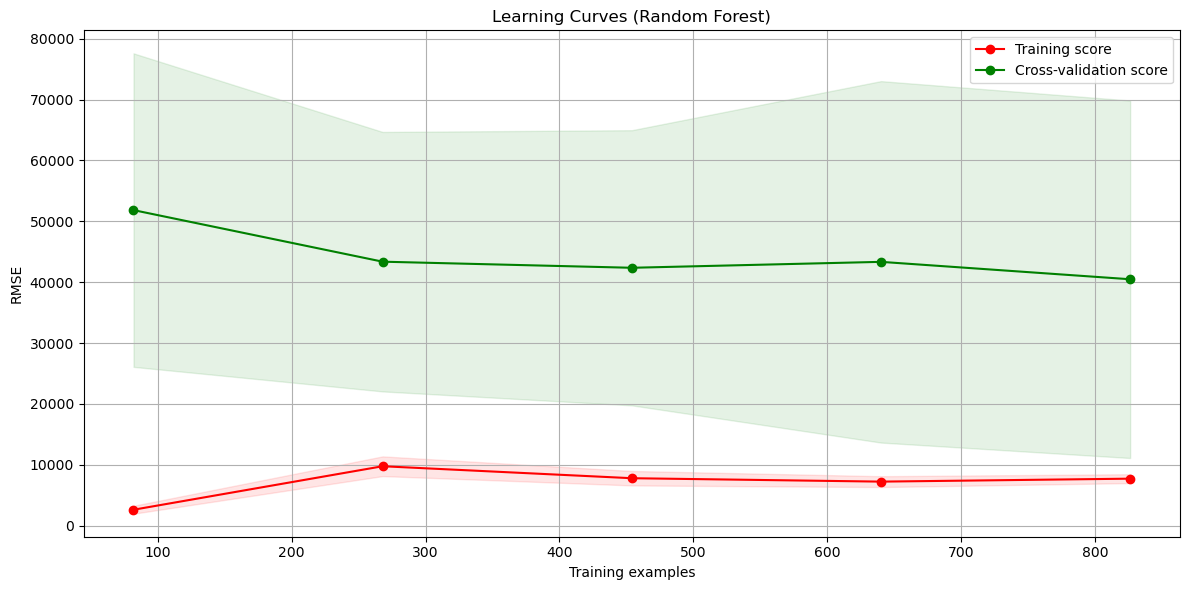

In [58]:
# Generating learning curves
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=10, scoring="neg_mean_squared_error", 
                                                        train_sizes=np.linspace(0.1, 1.0, 5))

# Calculating mean and standard deviation for training and test sets
train_scores_mean = np.mean(np.sqrt(-train_scores), axis=1)
train_scores_std = np.std(np.sqrt(-train_scores), axis=1)
test_scores_mean = np.mean(np.sqrt(-test_scores), axis=1)
test_scores_std = np.std(np.sqrt(-test_scores), axis=1)

# Plotting learning curves
plt.figure(figsize=(12, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()



- The Training Score (Red) starts very low, indicating a low error when the model is trained on a small subset of data. As more training examples are added, the error (RMSE) increases slightly and then decreases again. This indicates that the model is able to learn from the data and improve its performance.
- Cross-validation Score (Green): Starts relatively high, indicating a higher error when the model is validated on a small subset of data. As more training examples are used, the validation error decreases and starts converging towards the training score.
  
- The gap between the training and validation scores narrows as more data is added, indicating that adding more data might help the model generalize better.

- The model shows signs of overfitting when trained on a smaller dataset, as indicated by the significant gap between training and validation errors. As more data is added, the model starts to generalize better, reducing the gap.

- The curves start to converge, suggesting that adding even more data might continue to benefit the model's performance on unseen data.

In summary, our Random Forest model demonstrates good performance. The convergence of the training score and cross-validation score towards the end suggest that the model generalises well for unseen data. 

## Model Improvement: Hyperparameter Tuning
- To further improve model performance, we chose to utilise hyperparameter tuning using GridSearch.

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
# Split the Data
X = df.drop(columns=['State', 'business_applications', 'year'])
y = df['business_applications']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Define the model to use for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Train model on every combination of hyperparameters
grid_search_rf.fit(X_train, y_train)

# Extract the best model
best_rf = grid_search_rf.best_estimator_

# Evaluate the best model
y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

performance_metrics = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R-squared'],
    'Value': [rmse, mae, r2]
})

# Extracting the optimal hyperparameters and best score from the grid search
optimal_hyperparameters = grid_search_rf.best_params_
best_score = grid_search_rf.best_score_

# Creating a DataFrame to display the results
df_optimal_metrics = pd.DataFrame({
    'Hyperparameter': optimal_hyperparameters.keys(),
    'Optimal Value': optimal_hyperparameters.values()
})

# Appending the best score to the DataFrame
df_optimal_metrics = df_optimal_metrics.append({
    'Hyperparameter': 'Best Score (Negative MSE)',
    'Optimal Value': best_score
}, ignore_index=True)

print(df_optimal_metrics)

print(performance_metrics)


Fitting 5 folds for each of 405 candidates, totalling 2025 fits
              Hyperparameter   Optimal Value
0                  max_depth              20
1               max_features            sqrt
2           min_samples_leaf               1
3          min_samples_split               2
4               n_estimators             300
5  Best Score (Negative MSE) -789,586,681.16
      Metric     Value
0       RMSE 12,402.92
1        MAE  6,883.49
2  R-squared      0.97


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


- The results of our hyperparameter tuning indicate on optimal max depth of our random forest of 20. This is a significant increase from the default max depth of 10.  

- The optimal number of estimators is 300 which is a significant increase from the default of 100. 

- Our refined model exhibits an increase in performance through lower RMSE and MAE vales aswell as an increased R^2 value.

## Model Comparison

In [61]:
# Predict using the old model
y_pred_old = rf_model.predict(X_test)

# Predict using the best model from grid search
y_pred_new = best_rf.predict(X_test)

# Performance metrics for the old model
rmse_old = np.sqrt(mean_squared_error(y_test, y_pred_old))
mae_old = mean_absolute_error(y_test, y_pred_old)
r2_old = r2_score(y_test, y_pred_old)

# Performance metrics for the new model
rmse_new = np.sqrt(mean_squared_error(y_test, y_pred_new))
mae_new = mean_absolute_error(y_test, y_pred_new)
r2_new = r2_score(y_test, y_pred_new)

# Compile metrics into a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R-squared'],
    'Old Model': [rmse_old, mae_old, r2_old],
    'New Model': [rmse_new, mae_new, r2_new]
})

print(comparison_df)


      Metric  Old Model  New Model
0       RMSE  14,459.30  12,402.92
1        MAE   7,099.45   6,883.49
2  R-squared       0.96       0.97


When comparing the new model to the old model, the new model has lower RMSE and MAE values and a higher R2 value. These metrics indicated that the model is performin better than the previous model. Thus, hyperparameter tuning has improved the model's performance which now explains 97% of the variance in the data.

# Feature Importance with Random Forest

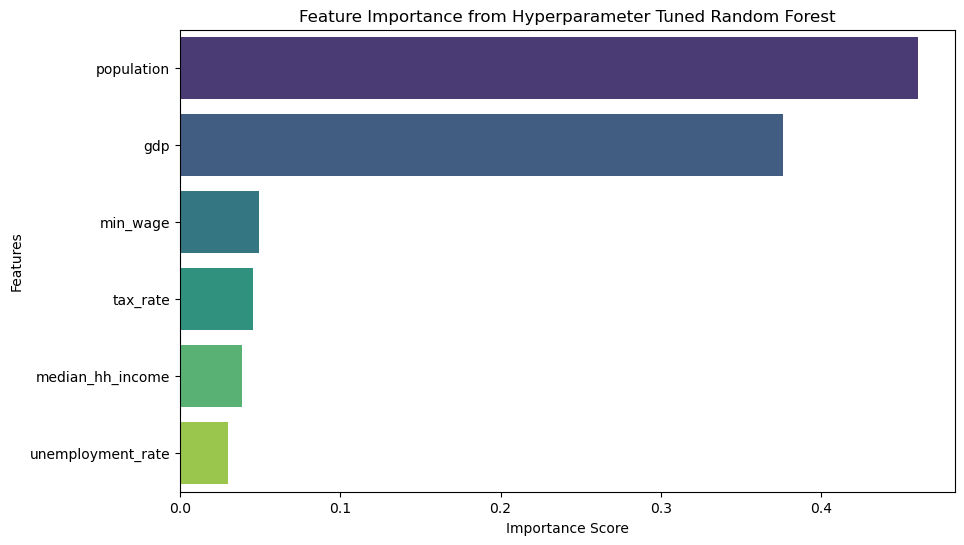

In [62]:
# Extracting feature importances from the updated Random Forest model
feature_importances = best_rf.feature_importances_

# Combining feature names and their importance scores
features_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sorting the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette="viridis")
plt.title('Feature Importance from Hyperparameter Tuned Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


1. GDP: Unsurprisingly, the Gross Domestic Product (GDP) of a state plays the most significant role. A higher GDP often indicates a stronger economy, which can attract more businesses.

2. Population: The population of a state is the next most important factor. States with larger populations may offer more market opportunities, attracting more businesses.

3. Median Household Income: States with higher median household incomes may indicate a more affluent customer base, potentially drawing more business applications.

4. Tax Rate: Interestingly, the tax rate is relatively less important, suggesting that while taxes matter, they might not be the primary consideration for businesses.

5. Unemployment Rate: The unemployment rate has a moderate importance. A lower unemployment rate could signal a healthy economy, which may be attractive to businesses.

6. Minimum Wage: The minimum wage is the least influential among the factors considered. It might be because businesses consider a range of labor and operational costs, not just the minimum wage.

# Testing Model Robustness


## Cross Validation

In [63]:
# Get cross-validation scores for the best_rf model
rf_r2_scores, rf_mae_scores, rf_rmse_scores = get_cv_scores(best_rf, X, y, cv)

# Create a DataFrame to store the mean and std deviation of the scores for best_rf
updated_rd_results = pd.DataFrame({
    "Model": ["Random Forest (Best RF)"],
    "R2 Mean": [rf_r2_scores.mean()],
    "MAE Mean": [rf_mae_scores.mean()],
    "RMSE Mean": [rf_rmse_scores.mean()],
})

updated_rd_results


,Model,R2 Mean,MAE Mean,RMSE Mean
0,Random Forest (Best RF),0.94,"8,210.90","19,117.24"


This discrepancy between the initial $R^2$ (from the train-test split) and the cross-validation $R^2$ suggests that our model might have overfit to the initial training set or that there might be some state-specific patterns that the model is not capturing well when validated on different data splits.

## Residual Analysis

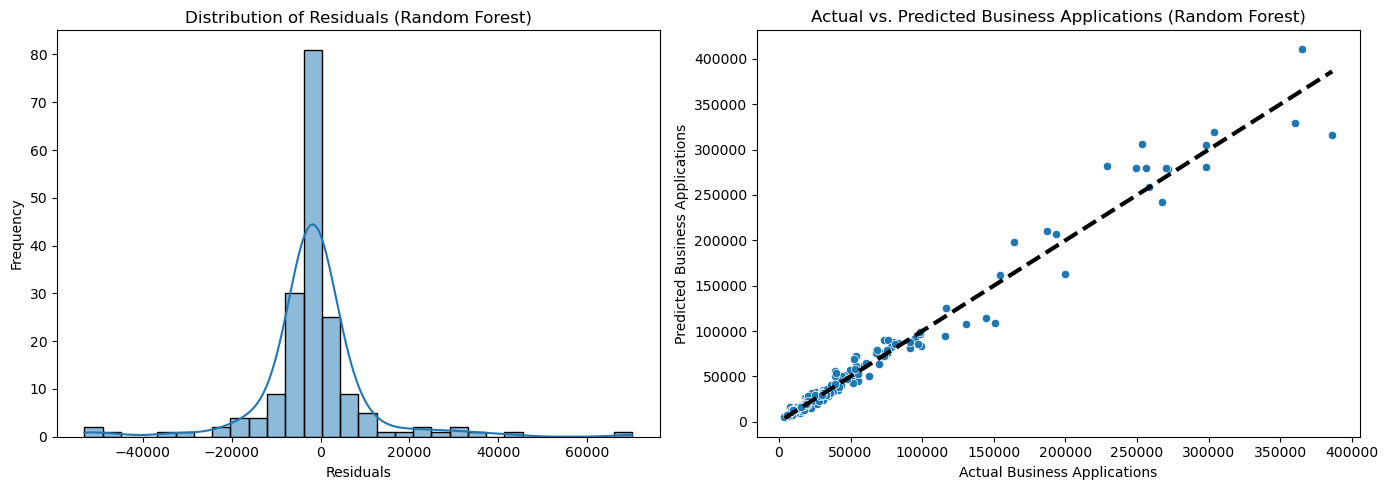

In [64]:
# Predictions on the test set using Random Forest
y_pred_rf = best_rf.predict(X_test)

# Calculating residuals
residuals_rf = y_test - y_pred_rf

# Plotting residuals distribution and scatter plot of actual vs predicted values
plt.figure(figsize=(14, 5))

# Distribution of Residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals_rf, bins=30, kde=True)
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Business Applications')
plt.ylabel('Predicted Business Applications')
plt.title('Actual vs. Predicted Business Applications (Random Forest)')

plt.tight_layout()
plt.show()


Actual vs. Predicted Business Applications: The scatter plot on the right compares the actual number of business applications against the predicted values. The dashed line represents a perfect prediction. Points close to this line indicate accurate predictions, while points farther away represent errors. The model seems to perform well for a majority of the data points, though there are a few outliers.

Given these insights, the Random Forest model provides a good, albeit not perfect, understanding of the relationship between economic factors and the economic popularity of a state.


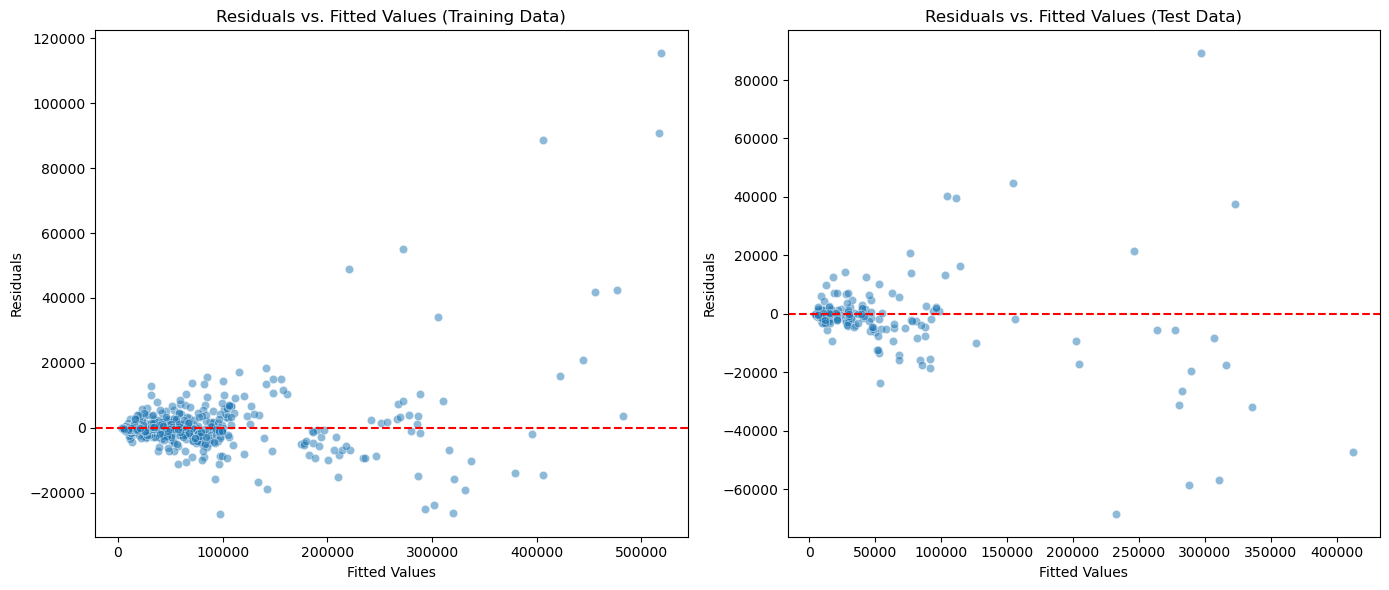

In [65]:
# Calculating residuals for training and test data
residuals_train_rf = y_train - y_train_pred_rf
residuals_test_rf = y_test - y_test_pred_rf

# Plotting residuals
plt.figure(figsize=(14, 6))

# Residuals for Training Data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred_rf, y=residuals_train_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values (Training Data)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Residuals for Test Data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred_rf, y=residuals_test_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values (Test Data)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


The red dashed line at zero represents no residuals, which means the predictions would be perfect.

For both the training and test data, the residuals seem to be randomly distributed around the zero line, which is a good sign. This suggests that there aren't obvious patterns in the model's errors.

There's a slightly higher concentration of residuals around the lower fitted values, which might indicate that the model's performance varies based on the magnitude of the predicted value.

# Using Shapley Values to Interpret the Model

In [66]:
import shap

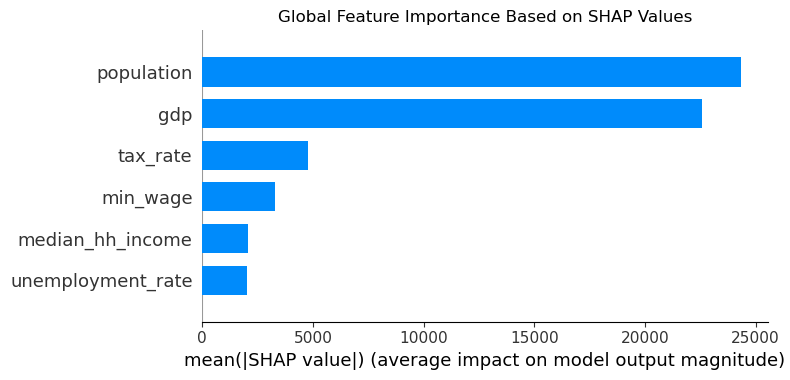

In [67]:
explainer = shap.TreeExplainer(best_rf)

# Calculating SHAP values for a subset of the data
shap_values = explainer.shap_values(X_train)


shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.title("Global Feature Importance Based on SHAP Values")
plt.tight_layout()
plt.show()


# Comparing Predictions to Observations


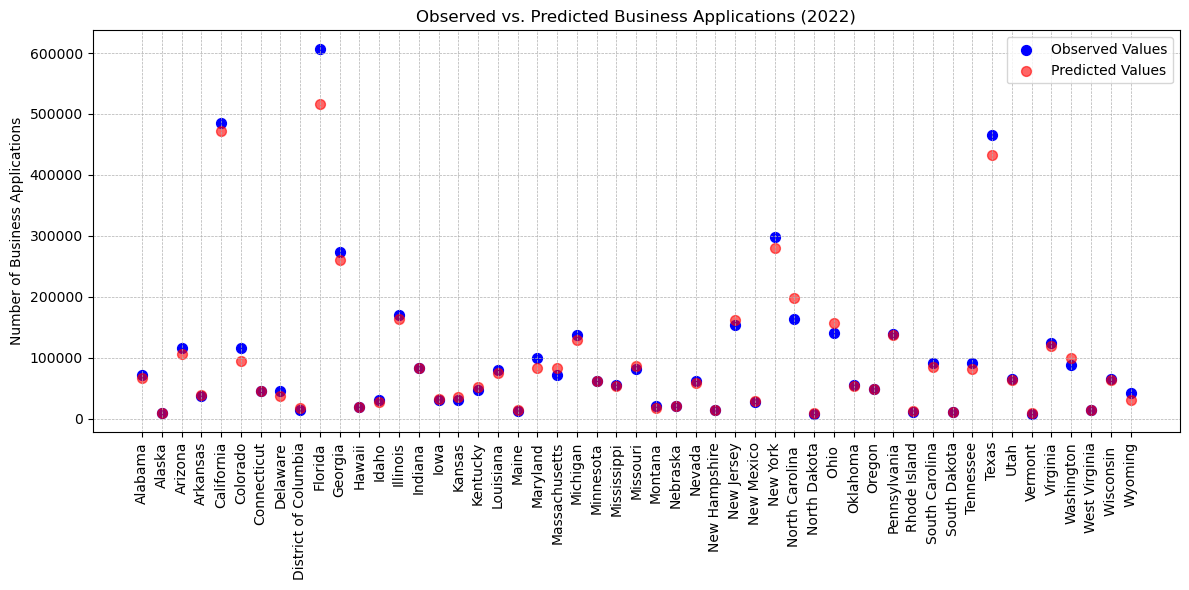

In [68]:
# Getting the data for 2022
data_2022 = df[df['year'] == 2022]
X_2022 = data_2022.drop(columns=['State', 'business_applications', 'year'])

# Predicting business applications for 2022
predictions_2022 = best_rf.predict(X_2022)

# Plotting the predicted vs observed values for 2022
plt.figure(figsize=(12, 6))
plt.scatter(data_2022['State'], data_2022['business_applications'], color='blue', label='Observed Values', s=50)
plt.scatter(data_2022['State'], predictions_2022, color='red', label='Predicted Values', s=50, alpha=0.6)
plt.xticks(rotation=90)
plt.ylabel('Number of Business Applications')
plt.title('Observed vs. Predicted Business Applications (2022)')
plt.legend()
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()